* Check if Coriolis force inhibit near-field mixing by inhibit near-field spreading.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import StraTimeSeries as sts
import DetermineEdgePlume as DEP
import R_mixStuff as RS
from R_mixStuff import sites
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [3]:
## load grid_T model results
octriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
mayriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
janriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
mayall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
janall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

octnowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
maynowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_T.nc')
jannowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')

octnotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
maynotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_T.nc')
jannotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
maynof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_T.nc')
jannof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_T.nc')

In [4]:
## load grid_U model results
octriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
mayriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_U.nc')
janriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
mayall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
janall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')

octnowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
maynowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_U.nc')
jannowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_U.nc')

octnotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
maynotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_U.nc')
jannotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_U.nc')
maynof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_U.nc')
jannof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_U.nc')

In [5]:
## load grid_V model results
octriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')
mayriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_V.nc')
janriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')
mayall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_V.nc')
janall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_V.nc')

octnowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')
maynowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_V.nc')
jannowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_V.nc')

octnotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')
maynotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_V.nc')
jannotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_V.nc')
maynof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_V.nc')
jannof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_V.nc')

In [6]:
def get_Rmix(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,dep_ind):
    """This function was made to get the time averaged Rmix"""
    rmix = {};
    for grid_T,st,in zip([gridT1,gridT2,gridT3,gridT4,gridT5],['onlyriver','river+tides',\
                        'river+winds','nof','all']):
        S = grid_T.variables['vosaline']
        lon = grid_T.variables['nav_lon']
        dep = grid_T.variables['deptht']

        S_ave = np.nanmean(S[tst:ted+1],axis = 0)
        rmix[st] = RS.R_mixAve(S_ave,np_mask,dep_ind)
    return rmix

In [8]:
def determine_plume_method2_onlysalinity(grid_T,tst,ted,dep_ind):
    """Similar to method1, but this time the S_ref is the spatial mean 
    of the 2.5*2.5 km in the northern of my subdomain and not plot them, only get the
    threshold salinity"""
    S = grid_T.variables['vosaline']
    lon = grid_T.variables['nav_lon']
    lat = grid_T.variables['nav_lat']
    S_aveN = np.nanmean(S[tst:ted,:,-5:,0:5],axis = 0) ## first temporal average of northern region
    S_ref = np.nanmean(S_aveN[dep_ind]) ## then spatial average
    S_thre = 1.14*S_ref-4.8
    S_aveW = np.nanmean(S[tst:ted,dep_ind],axis = 0) ## temporal averaged of the whole domain
    S_aveW = np.ma.masked_values(S_aveW, 0) ## mask 0 value
    return S_thre, S_aveW

In [32]:
def threshold_whole_domain2(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind,dep):
    """This is another criteria for determine near of far field
        (Rmix(wind)-Rmix(tide))/Rmix(nof)>0.1 then far field"""
    thre_values = []; thre_js = [];thre_is = [];
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    threshold_nof = (rmix['river+winds'] - rmix['river+tides'])/rmix['nof']
    threshold_f = (rmix['river+winds'] - rmix['river+tides'])/rmix['all']
    S_thre,W = determine_plume_method2_onlysalinity(all_T,tst,ted,dep)
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    levels = [-0.2,-0.1,0,0.1,0.2,0.3]
    origin = 'lower';
    fig, axs = plt.subplots(1,3,figsize = (20,5))
    for ax,thre,st in zip(axs[:-1],[threshold_f,threshold_nof],['with f','no f']):
        CS = ax.contourf(lon[:],lat[:],thre[:],levels,cmap = 'jet',origin=origin,extend='both')
        CS2 = ax.contour(CS,levels=CS.levels,colors = 'k', origin=origin,hold='on',linewidths=(2,))
        ax.set_title(st)
        cbar = fig.colorbar(CS,ax = ax)
        cbar.add_lines(CS2)
        cbar.set_label('Rmix')
    ## plot plume edge on top of the different plume regions
        CS3 = ax.contour(lon[:],lat[:],W, levels = [S_thre-4,S_thre-2,S_thre,S_thre+2], colors='cyan',linewidths=(2,))
        CS3.collections[-2].set_linewidth(3.5) 
        plt.clabel(CS3,fmt='%2.1f', colors='k',fontsize = 14)
    ax = axs[-1]
    levels_diff = [-0.05,-0.03,0,0.03,0.05]
    CS = ax.contourf(lon[:],lat[:],threshold_nof[:]-threshold_f[:],levels_diff,cmap = 'jet',origin=origin,extend='both')
    CS2 = ax.contour(CS,levels=CS.levels,colors = 'k', origin=origin,hold='on',linewidths=(2,))
    cbar = fig.colorbar(CS,ax = ax)
    cbar.add_lines(CS2)
    cbar.set_label('Rmix')
    CS3 = ax.contour(lon[:],lat[:],W, levels = [S_thre], colors='cyan',linewidths=(2,))
    for ax in axs:
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')
        ax.set_xlim([-124.,-122.8])
        ax.set_ylim([48.9,49.5])

# Time-averaged 

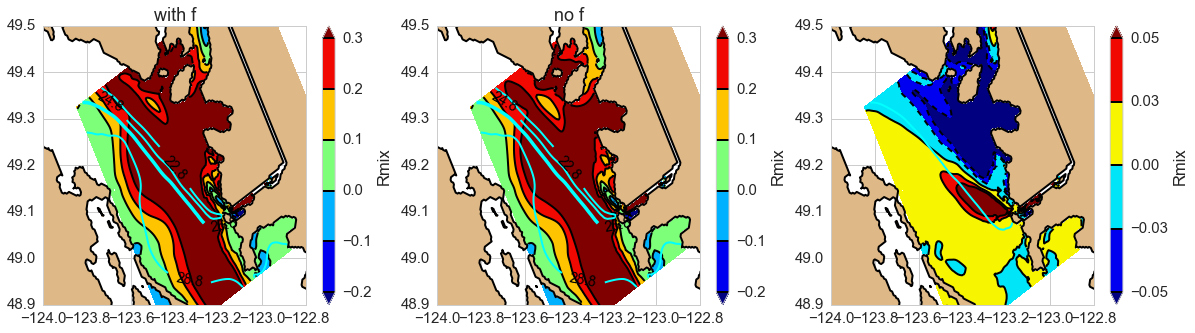

In [21]:
## moderate wind oct
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,408,480,10,0)

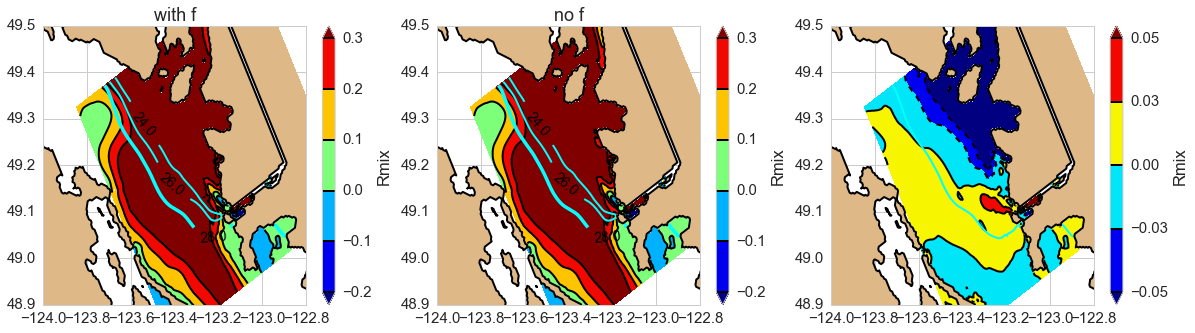

In [22]:
## strong wind oct
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,480,551,10,0)

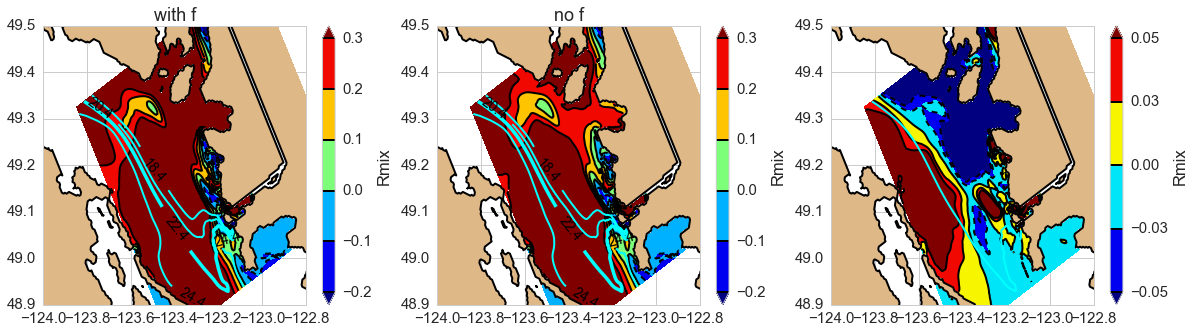

In [23]:
## moderate may blow to NW
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,288,359,10,0)

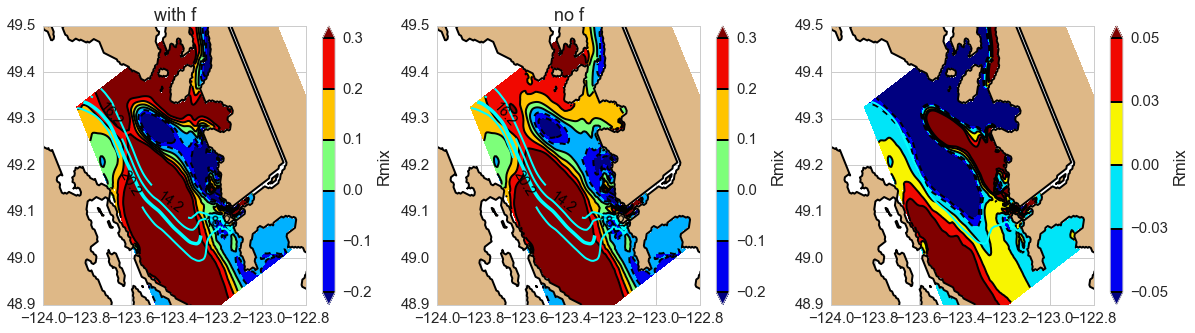

In [27]:
## moderate may blow to SE
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,360,455,10,0)

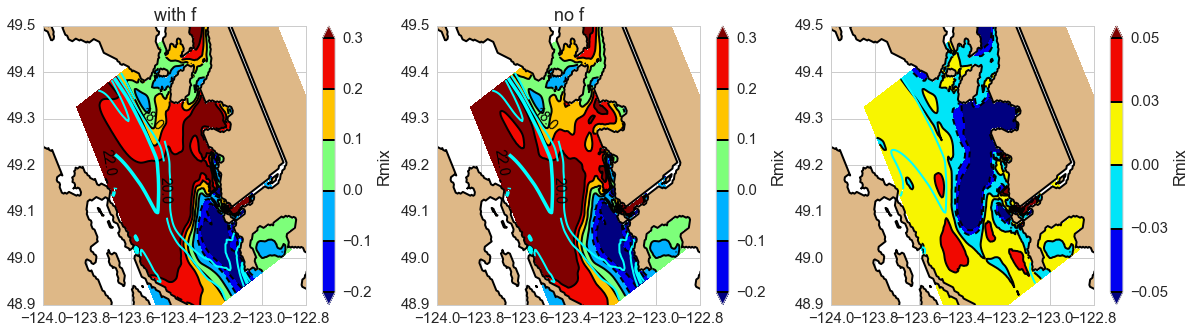

In [24]:
## strong may blow to SE
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,24,95,10,0)

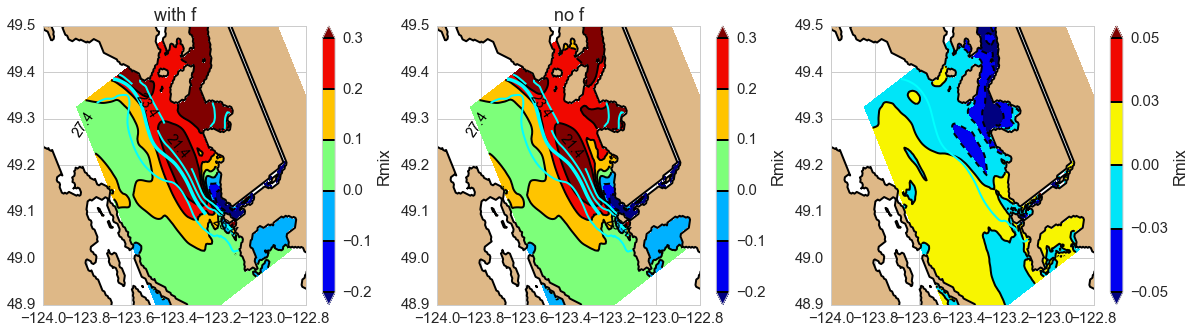

In [25]:
## moderate jan
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,384,455,10,0)

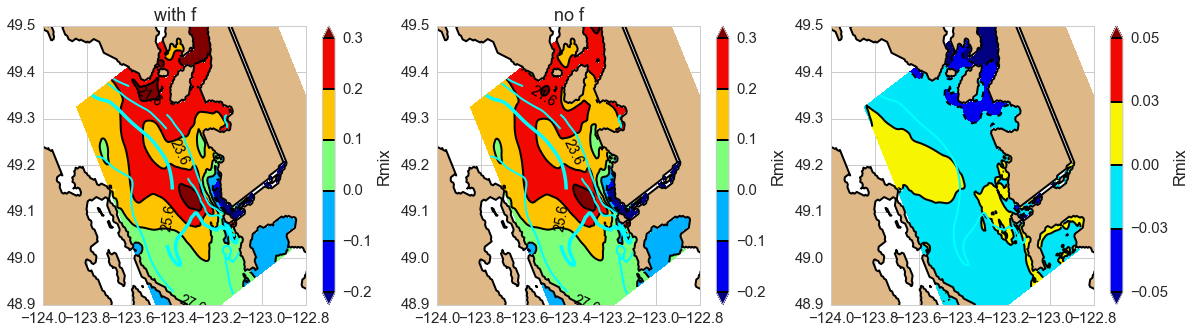

In [26]:
## strong jan
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,624,671,10,0)

* On time-averaged sense, very weak contribution of Coriolis force in inhibiting the near-field plume mixing only when wind direction blows to NW, with Rmix difference of 0.03 in maximum. When wind direction blows to SE, Coriolis generates more mixing in the near-field (Strong May, moderate SE May).
* Coriolis force doesn't appear to limit the near-field spreading in all cases.

# Instantaneous peak ebb time

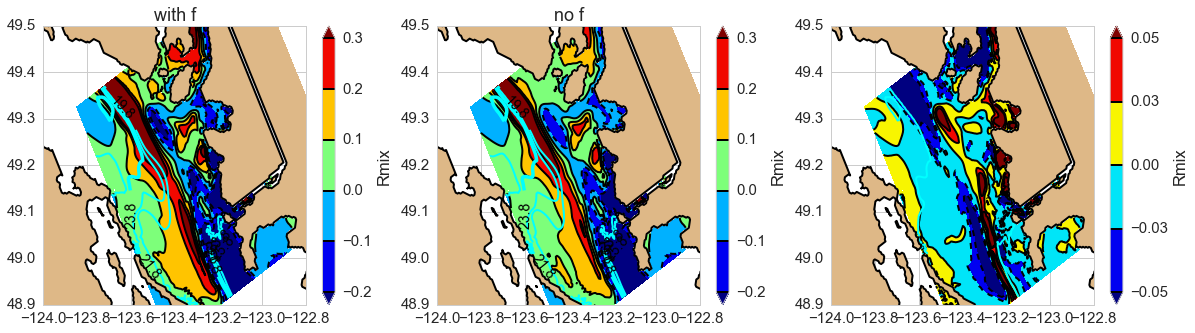

In [28]:
## October
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,196,197,10,0)

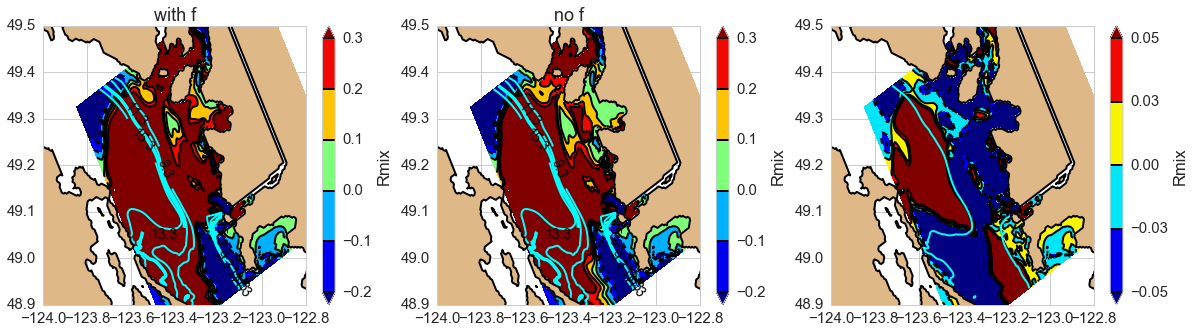

In [29]:
## May
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,734,735,10,0)

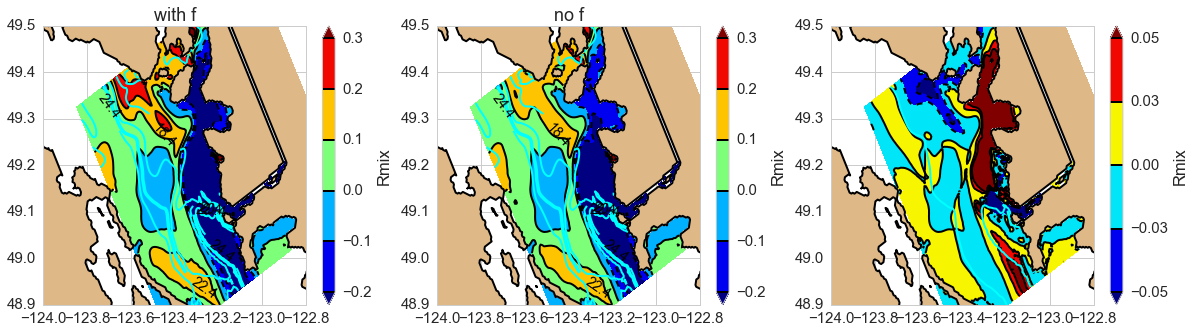

In [31]:
## Jan
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,202,203,10,0)

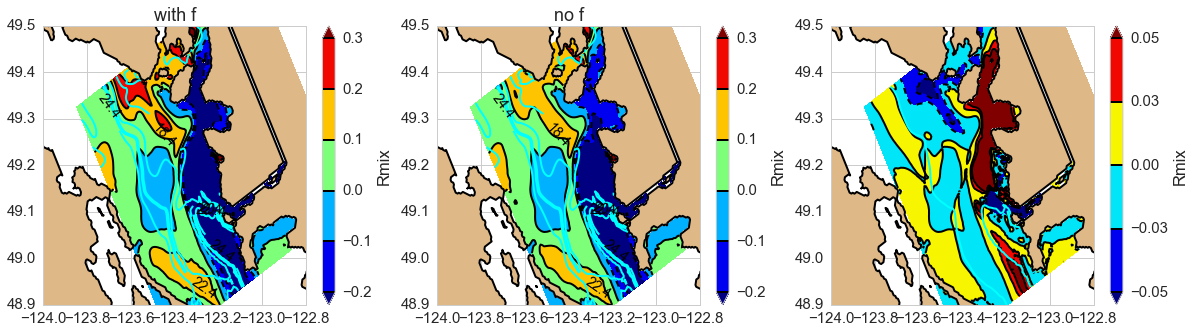

In [33]:
rmix = threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,202,203,10,0)

# Three particles

In [63]:
## load Ariane results
withf_oct = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct2014withf/ariane_trajectories_qualitative.nc')
nof_oct = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct2014nof/ariane_trajectories_qualitative.nc')

In [64]:
lon_f = withf_oct.variables['traj_lon']
lat_f = withf_oct.variables['traj_lat']
lon_nof = nof_oct.variables['traj_lon']
lat_nof = nof_oct.variables['traj_lat']

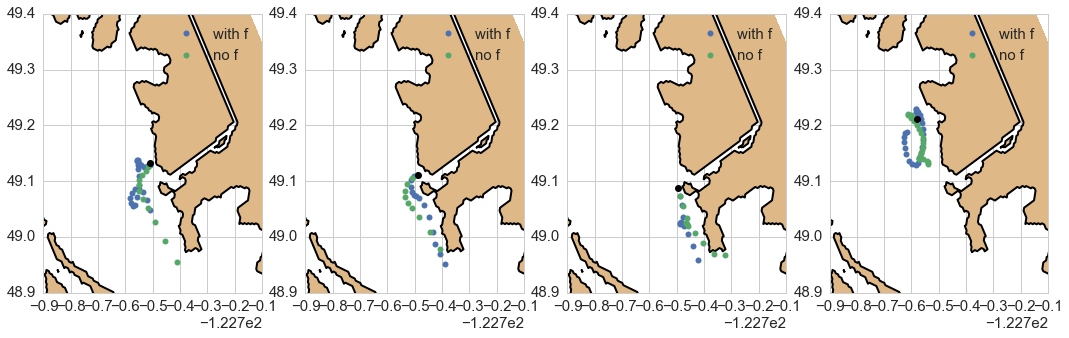

In [65]:
fig, axs = plt.subplots(1,4,figsize = (18,5))
for ax, i in zip([axs[0],axs[1],axs[2],axs[3]],np.arange(4)):
    ax.plot(lon_f[1:,i],lat_f[1:,i],'.',markersize = 12,label = 'with f')
    ax.plot(lon_nof[1:,i],lat_nof[1:,i],'.',markersize = 12,label = 'no f')
    ax.plot(lon_f[0,i],lat_f[0,i],'ko')
    ax.legend()
    viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
    viz_tools.plot_coastline(ax, grid6, coords = 'map')
    ax.set_xlim([-123.6,-122.8])
    ax.set_ylim([48.9,49.4])